In [17]:
import os
import pandas as pd
import xml.etree.ElementTree as ET
from natsort import natsorted
import matplotlib.pyplot as plt

wd = '/home/max_vdl/bioinf_isilon/core_bioinformatics_unit/Internal/max_vdl/coreBioinf/kalinchenko/tissueGeneEx'

rna_expression_df_main = pd.read_csv(f'{wd}/data/proteomicsDB/mm9_mainProts.csv')
rna_expression_df_main = rna_expression_df_main.pivot(index='Tissue Name', columns='Gene Name', values='Avarage Normalized Intensity')
rna_expression_df_main.index = rna_expression_df_main.index.str.capitalize()
selected_tissues = ['Tonsil', 'Vermiform appendix', 'Bone marrow', 'Spleen', 'Lymph node',
       'Brain', 'Cerebellum', 'Cerebral cortex', 'Prefrontal cortex', 'Temporal lobe',
       'Thyroid gland', 'Adrenal gland', 'Prostate gland', 'Pancreas']
rna_expression_df_main

Gene Name,Plek,Rce1,Sptlc1,Sptlc2,Sptssa,Zdhhc17
Tissue Name,,,,,,
Adrenal gland,0.81,1.37,1.28,1.05,1.85,0.68
Brown adipose tissue,-0.03,1.16,1.19,0.64,1.48,0.91
Cerebellum,0.78,1.49,1.23,1.01,1.76,1.73
Duodenum,0.07,1.30,1.29,1.58,2.35,0.03
Epididymis,0.34,1.40,1.40,1.15,2.08,0.58
Esophagus,0.36,1.05,1.33,1.01,1.72,0.56
Frontal lobe,0.90,1.31,1.33,1.01,1.57,1.71
Heart,0.02,0.73,0.81,0.53,1.41,0.64
Hindbrain,0.70,1.28,1.23,0.82,1.77,1.46


In [12]:
tissue_organs = {
    'Adrenal gland': 'Endocrine tissues',
    'Brown adipose tissue': 'Connective & Soft tissue',
    'Cerebellum': 'Brain',
    'Duodenum': 'Gastrointestinal tract',
    'Epididymis': 'Male tissues',
    'Esophagus': 'Gastrointestinal tract',
    'Frontal lobe': 'Brain',
    'Heart': 'Skin',
    'Hindbrain': 'Brain',
    'Hippocampus': 'Brain',
    'Kidney': 'Kidney & Urinary bladder',
    'Liver': 'Gastrointestinal tract',
    'Lung': 'Respiratory system',
    'Lymph node': 'Bone marrow & Lymphoid tissues',
    'Occipital lobe': 'Brain',
    'Olfactory bulb': 'Brain',
    'Ovary': 'Female tissues',
    'Pancreas': 'Endocrine tissues',
    'Prostate gland': 'Endocrine tissues',
    'Salivary gland': 'Gastrointestinal tract',
    'Skeletal muscle': 'Connective & Soft tissue',
    'Skin': 'Skin',
    'Small intestine': 'Gastrointestinal tract',
    'Spinal cord': 'Brain',
    'Stomach': 'Gastrointestinal tract',
    'Temporal lobe': 'Brain',
    'Testis': 'Male tissues',
    'Tongue': 'Gastrointestinal tract',
    'Urinary bladder': 'Kidney & Urinary bladder'
}
color_dict = {'Bone marrow & Lymphoid tissues': 'blue',
    'Brain': 'orange',
    'Connective & Soft tissue': 'green',
    'Endocrine tissues': 'red',
    'Eye': 'purple',
    'Female tissues': 'brown',
    'Gastrointestinal tract': 'pink',
    'Kidney & Urinary bladder': 'gray',
    'Liver & Gallbladder': 'olive',
    'Male tissues': 'cyan',
    'Muscle tissues': 'navy',
    'Pancreas': 'lavender',
    'Proximal digestive tract': 'coral',
    'Respiratory system': 'teal',
    'Skin': 'magenta'}
rna_expression_df_main['organ'] = rna_expression_df_main.index.to_series().map(tissue_organs)
rna_expression_df_main['color'] = rna_expression_df_main['organ'].map(color_dict)
rna_expression_df_main = rna_expression_df_main.sort_values('organ', axis=0)
rna_expression_df_main




Gene Name,Plek,Rce1,Sptlc1,Sptlc2,Sptssa,Zdhhc17,organ,color
Tissue Name,,,,,,,,
Lymph node,0.40,0.77,0.95,0.61,1.33,0.06,Bone marrow & Lymphoid tissues,blue
Occipital lobe,0.78,1.33,1.19,0.79,1.70,1.48,Brain,orange
Cerebellum,0.78,1.49,1.23,1.01,1.76,1.73,Brain,orange
Temporal lobe,0.90,1.26,1.26,0.95,1.59,1.73,Brain,orange
Spinal cord,0.81,1.19,1.34,1.08,1.77,1.63,Brain,orange
Frontal lobe,0.90,1.31,1.33,1.01,1.57,1.71,Brain,orange
Hindbrain,0.70,1.28,1.23,0.82,1.77,1.46,Brain,orange
Hippocampus,0.87,1.28,1.33,1.08,1.66,1.65,Brain,orange
Olfactory bulb,1.02,1.39,1.37,0.99,1.69,1.71,Brain,orange


In [13]:
rna_expression_df_zinc = pd.read_csv(f'{wd}/data/proteomicsDB/mm9_zincProts.csv')
rna_expression_df_zinc = rna_expression_df_zinc.pivot(index='Tissue Name', columns='Gene Name', values='Avarage Normalized Intensity')
rna_expression_df_zinc.index = rna_expression_df_zinc.index.str.capitalize()
rna_expression_df_zinc['organ'] = rna_expression_df_zinc.index.to_series().map(tissue_organs)
rna_expression_df_zinc['color'] = rna_expression_df_zinc['organ'].map(color_dict)
rna_expression_df_zinc = rna_expression_df_zinc.sort_values('organ', axis=0)
colorder = natsorted(list(rna_expression_df_zinc.columns))
rna_expression_df_zinc = rna_expression_df_zinc.reindex(colorder, axis=1)
rna_expression_df_zinc

Gene Name,Zdhhc1,Zdhhc2,Zdhhc3,Zdhhc4,Zdhhc5,Zdhhc6,Zdhhc7,Zdhhc8,Zdhhc9,Zdhhc11,...,Zdhhc17,Zdhhc18,Zdhhc19,Zdhhc20,Zdhhc21,Zdhhc22,Zdhhc23,Zdhhc24,color,organ
Tissue Name,,,,,,,,,,,,,,,,,,,,,
Lymph node,0.52,0.19,0.83,0.82,1.00,0.99,0.64,0.13,0.89,NaN,...,0.06,0.43,NaN,0.69,0.21,-1.72,-1.85,0.29,blue,Bone marrow & Lymphoid tissues
Occipital lobe,1.38,1.48,1.61,1.38,1.24,1.27,1.18,1.28,1.32,NaN,...,1.48,1.04,NaN,1.25,0.80,1.27,-1.24,1.06,orange,Brain
Cerebellum,1.40,1.50,1.75,1.46,1.49,1.43,1.25,1.06,1.40,NaN,...,1.73,1.18,NaN,1.22,0.99,0.76,NaN,1.19,orange,Brain
Temporal lobe,1.29,1.64,1.68,1.24,1.42,1.32,1.24,1.38,1.54,-1.76,...,1.73,1.13,NaN,1.32,1.13,1.47,NaN,1.05,orange,Brain
Spinal cord,1.43,1.29,1.84,1.44,1.30,1.36,1.20,1.31,1.54,-1.58,...,1.63,1.13,NaN,1.58,0.88,1.39,NaN,1.16,orange,Brain
Frontal lobe,1.31,1.56,1.73,1.33,1.45,1.38,1.30,1.44,1.57,-1.86,...,1.71,1.17,NaN,1.22,1.11,1.52,-0.98,1.10,orange,Brain
Hindbrain,1.39,1.24,1.60,1.38,1.19,1.29,1.10,1.15,1.26,NaN,...,1.46,1.02,-2.06,1.39,0.69,1.39,NaN,1.06,orange,Brain
Hippocampus,1.23,1.53,1.69,1.36,1.39,1.39,1.31,1.32,1.51,-1.82,...,1.65,1.14,NaN,1.29,1.00,1.52,-1.11,1.06,orange,Brain
Olfactory bulb,1.44,1.60,1.73,1.41,1.54,1.35,1.28,1.35,1.46,NaN,...,1.71,1.23,NaN,1.07,1.10,0.85,-0.46,1.09,orange,Brain


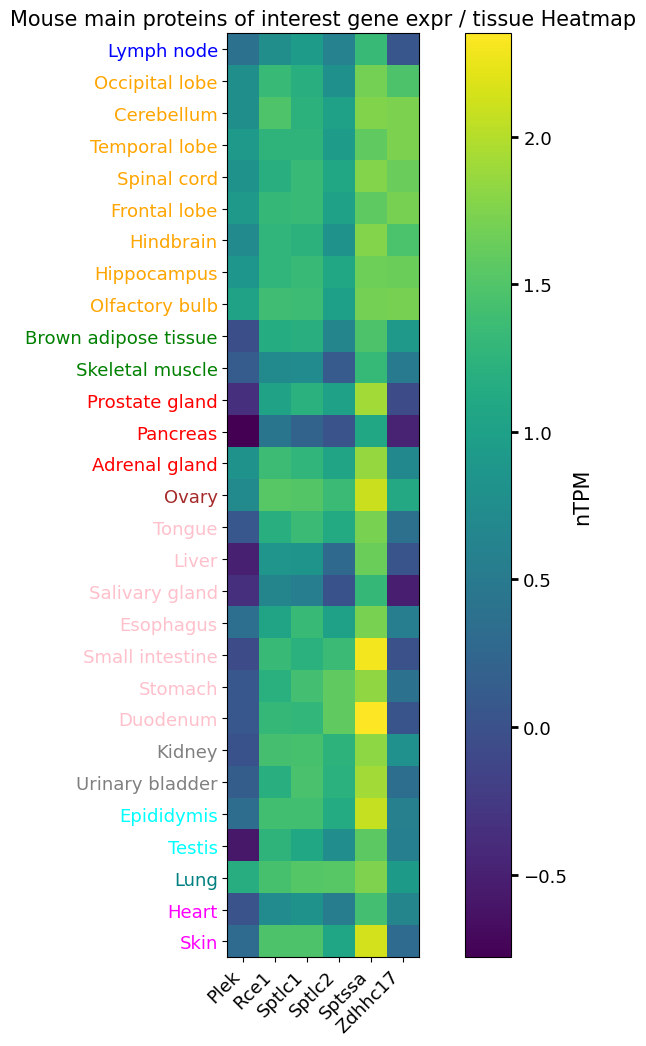

In [14]:
# Create the heatmap using matplotlib
fig, ax = plt.subplots(figsize=(12, 12))
df = rna_expression_df_main.iloc[:, :-2]
im = ax.imshow(df, cmap='viridis')

# Add x and y axis labels
ax.set_xticks(range(len(df.columns)))
ax.set_xticklabels(df.columns, fontsize=13, rotation=45, ha='right')
ax.set_yticks(range(len(df.index)))
ax.set_yticklabels(df.index, fontsize=13)

# colour labels by organ
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_color(rna_expression_df_main.loc[tick.label1.get_text()]['color']) #set the color property

# Add a colorbar legend
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=13, length=5, width=2)
cbar.set_label("nTPM", fontsize=15)

# Add a title
ax.set_title('Mouse main proteins of interest gene expr / tissue Heatmap', fontsize=15)

# Show/Save the plot
plt.show()
directory = os.path.expanduser("~/bioinf_isilon/core_bioinformatics_unit/Internal/max_vdl/coreBioinf/kalinchenko/tissueGeneEx/")
fig.savefig(f'{directory}/plots/proteomicsDB/mm9_mainProts.pdf', bbox_inches='tight')


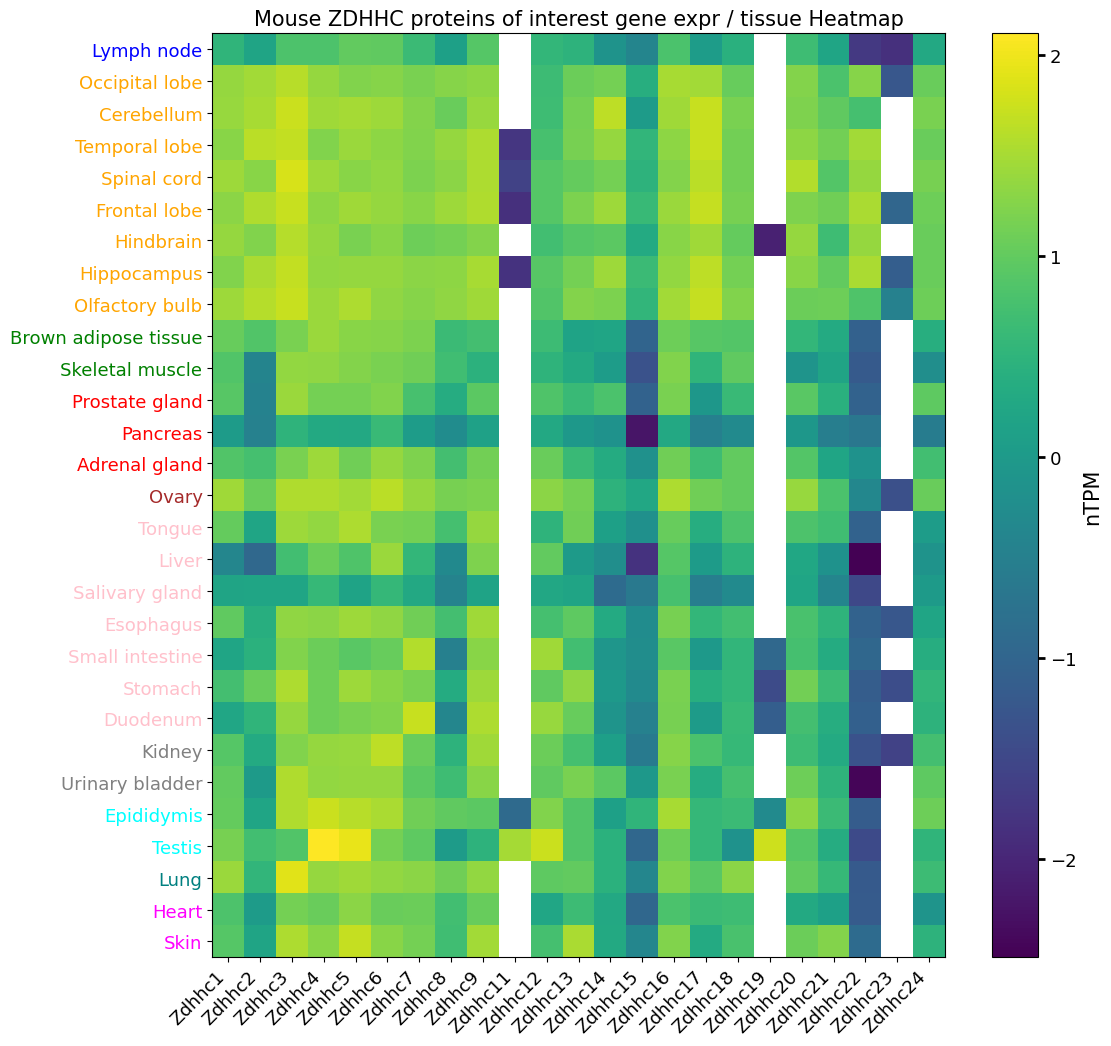

In [15]:
# Create the heatmap using matplotlib
fig, ax = plt.subplots(figsize=(12, 12))
df = rna_expression_df_zinc.iloc[:, :-2]
im = ax.imshow(df, cmap='viridis')

# Add x and y axis labels
ax.set_xticks(range(len(df.columns)))
ax.set_xticklabels(df.columns, fontsize=13, rotation=45, ha='right')
ax.set_yticks(range(len(df.index)))
ax.set_yticklabels(df.index, fontsize=13)

# colour labels by organ
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_color(rna_expression_df_zinc.loc[tick.label1.get_text()]['color']) #set the color property

# Add a colorbar legend
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=13, length=5, width=2)
cbar.set_label("nTPM", fontsize=15)

# Add a title
ax.set_title('Mouse ZDHHC proteins of interest gene expr / tissue Heatmap', fontsize=15)

# Show/Save the plot
plt.show()
directory = os.path.expanduser("~/bioinf_isilon/core_bioinformatics_unit/Internal/max_vdl/coreBioinf/kalinchenko/tissueGeneEx/")
fig.savefig(f'{directory}/plots/proteomicsDB/mm9_zincProts.pdf', bbox_inches='tight')


KeyError: "['Tonsil', 'Vermiform appendix', 'Bone marrow', 'Spleen', 'Brain', 'Cerebral cortex', 'Prefrontal cortex', 'Thyroid gland'] not in index"

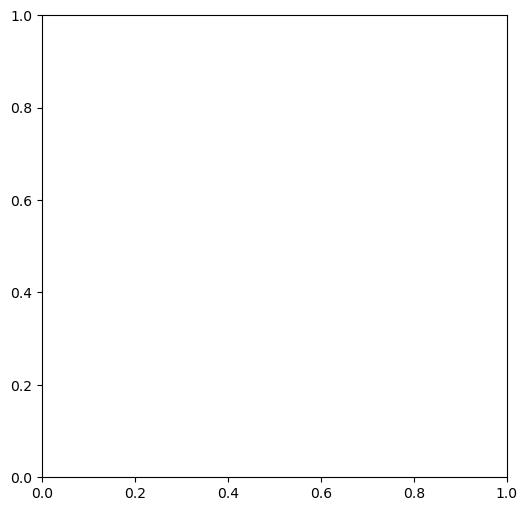

In [16]:
# Create the heatmap using matplotlib
fig, ax = plt.subplots(figsize=(6, 6))
df = rna_expression_df_main.loc[selected_tissues]
df = df.iloc[:, :-2]
im = ax.imshow(df, cmap='viridis')

# Add x and y axis labels
ax.set_xticks(range(len(df.columns)))
ax.set_xticklabels(df.columns, fontsize=13, rotation=45, ha='right')
ax.set_yticks(range(len(df.index)))
ax.set_yticklabels(df.index, fontsize=13)

# colour labels by organ
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_color(rna_expression_df_main.loc[tick.label1.get_text()]['color']) #set the color property

# Add a colorbar legend
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=13, length=5, width=2)
cbar.set_label("nTPM", fontsize=15)

# Add a title
ax.set_title('Mouse main proteins of interest gene expr / tissue Heatmap', fontsize=15)

# Show/Save the plot
plt.show()
directory = os.path.expanduser("~/bioinf_isilon/core_bioinformatics_unit/Internal/max_vdl/coreBioinf/kalinchenko/tissueGeneEx/")
fig.savefig(f'{directory}/plots/proteomicsDB/mm9_mainProts_selectedTissues.pdf', bbox_inches='tight')


In [ ]:
# Create the heatmap using matplotlib
fig, ax = plt.subplots(figsize=(14, 8))
df = rna_expression_df_zinc.loc[selected_tissues]
df = df.iloc[:, :-2]
im = ax.imshow(df, cmap='viridis')

# Add x and y axis labels
ax.set_xticks(range(len(df.columns)))
ax.set_xticklabels(df.columns, fontsize=13, rotation=45, ha='right')
ax.set_yticks(range(len(df.index)))
ax.set_yticklabels(df.index, fontsize=13)

# colour labels by organ
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_color(rna_expression_df_zinc.loc[tick.label1.get_text()]['color']) #set the color property

# Add a colorbar legend
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=13, length=5, width=2)
cbar.set_label("nTPM", fontsize=15)

# Add a title
ax.set_title('Mouse ZDHHC proteins of interest gene expr / tissue Heatmap', fontsize=15)

# Show/Save the plot
plt.show()
directory = os.path.expanduser("~/bioinf_isilon/core_bioinformatics_unit/Internal/max_vdl/coreBioinf/kalinchenko/tissueGeneEx/")
fig.savefig(f'{directory}/plots/proteomicsDB/mm9_zincProts_selectedTissues.pdf', bbox_inches='tight')


NameError: name 'plt' is not defined